### Data Preprocessing

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv(
    "Machine_status_code_History.csv",
    sep=";",              
    encoding="latin1"    
)

df.to_csv(
    "Machine_status_code_History_New.csv",
    index=False           
)

print("✅ Semicolon-free CSV created successfully!")


✅ Semicolon-free CSV created successfully!


In [5]:
df.isnull()

,plant,technology,cost_center_id,department,machine_id,plant_shift_date,production_order_number,tool_number,part_number,machine_status,machine_status_duration_seconds_quantity,mpim_class_name
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5930,False,False,False,False,False,False,False,False,False,False,False,False
5931,False,False,False,False,False,False,False,False,False,False,False,False
5932,False,False,False,False,False,False,False,False,False,False,False,False
5933,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

plant                                       0
technology                                  0
cost_center_id                              0
department                                  0
machine_id                                  0
plant_shift_date                            0
production_order_number                     0
tool_number                                 0
part_number                                 0
machine_status                              0
machine_status_duration_seconds_quantity    0
mpim_class_name                             0
dtype: int64

In [7]:
df.shape

(5935, 12)

In [8]:
df.describe()

,cost_center_id,machine_status_duration_seconds_quantity
count,5935.000000,5935.000000
mean,21012.893008,14980.860489
std,1.915253,21529.106259
min,21012.000000,0.000000
25%,21012.000000,1532.500000
50%,21012.000000,4548.000000
75%,21012.000000,18382.500000
max,21017.000000,112911.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5935 entries, 0 to 5934
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   plant                                     5935 non-null   object
 1   technology                                5935 non-null   object
 2   cost_center_id                            5935 non-null   int64 
 3   department                                5935 non-null   object
 4   machine_id                                5935 non-null   object
 5   plant_shift_date                          5935 non-null   object
 6   production_order_number                   5935 non-null   object
 7   tool_number                               5935 non-null   object
 8   part_number                               5935 non-null   object
 9   machine_status                            5935 non-null   object
 10  machine_status_duration_seconds_quantity  5935 n

In [10]:
df.describe

<bound method NDFrame.describe of       plant technology  cost_center_id     department machine_id  \
0     WOERT   Assembly           21017  Assembly Con.      A-409   
1     WOERT   Assembly           21017  Assembly Con.      A-409   
2     WOERT   Assembly           21017  Assembly Con.      A-409   
3     WOERT   Assembly           21017  Assembly Con.      A-409   
4     WOERT   Assembly           21017  Assembly Con.      A-409   
...     ...        ...             ...            ...        ...   
5930  WOERT   Stamping           21012   Stamping WRT      S-278   
5931  WOERT   Stamping           21012   Stamping WRT      S-278   
5932  WOERT   Stamping           21012   Stamping WRT      S-278   
5933  WOERT   Stamping           21012   Stamping WRT      S-278   
5934  WOERT   Stamping           21012   Stamping WRT      S-278   

     plant_shift_date production_order_number tool_number  part_number  \
0          2025-07-01        2002321134210020      (null)    2371390-1   
1

Input Features: ['plant', 'technology', 'cost_center_id', 'department', 'machine_id', 'plant_shift_date', 'production_order_number', 'tool_number', 'part_number', 'machine_status', 'machine_status_duration_seconds_quantity']
Target Column: mpim_class_name

=== ENCODING DETAILS ===

plant:
  WOERT -> 0

technology:
  Assembly -> 0
  Stamping -> 1

department:
  Assembly Con. -> 0
  Stamping WRT -> 1

machine_id:
  A-409 -> 0
  S-223 -> 1
  S-226 -> 2
  S-268 -> 3
  S-269 -> 4
  S-276 -> 5
  S-278 -> 6

plant_shift_date:
  2025-07-01 -> 0
  2025-07-02 -> 1
  2025-07-03 -> 2
  2025-07-04 -> 3
  2025-07-05 -> 4
  2025-07-06 -> 5
  2025-07-07 -> 6
  2025-07-08 -> 7
  2025-07-09 -> 8
  2025-07-10 -> 9
  2025-07-11 -> 10
  2025-07-12 -> 11
  2025-07-13 -> 12
  2025-07-14 -> 13
  2025-07-15 -> 14
  2025-07-16 -> 15
  2025-07-17 -> 16
  2025-07-18 -> 17
  2025-07-19 -> 18
  2025-07-20 -> 19
  2025-07-21 -> 20
  2025-07-22 -> 21
  2025-07-23 -> 22
  2025-07-24 -> 23
  2025-07-25 -> 24
  2025-07-

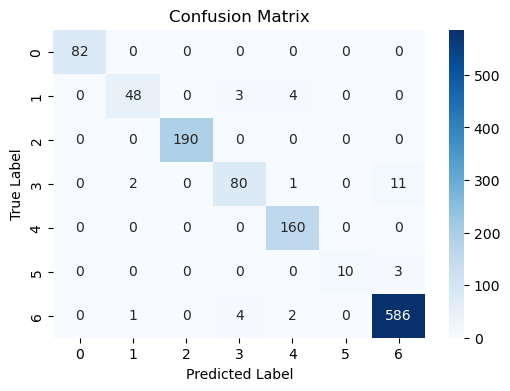


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       0.94      0.87      0.91        55
           2       1.00      1.00      1.00       190
           3       0.92      0.85      0.88        94
           4       0.96      1.00      0.98       160
           5       1.00      0.77      0.87        13
           6       0.98      0.99      0.98       593

    accuracy                           0.97      1187
   macro avg       0.97      0.93      0.95      1187
weighted avg       0.97      0.97      0.97      1187

Target Classes: ['(null)' 'ChangeOver' 'No Load' 'People' 'Production' 'Sample'
 'Technical']
Predicted Output: Production


In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("Machine_status_code_History_New.csv", encoding="latin1")


df = df.dropna()

X = df.iloc[:, :-1]   # all columns except last
y = df.iloc[:, -1]    # last column = target

print("Input Features:", X.columns.tolist())
print("Target Column:", y.name)

encoders = {}

for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        encoders[col] = le

if y.dtype == "object":
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)
else:
    le_target = None

print("\n=== ENCODING DETAILS ===")

for col, encoder in encoders.items():
    print(f"\n{col}:")
    for cls, code in zip(encoder.classes_, encoder.transform(encoder.classes_)):
        print(f"  {cls} -> {code}")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(
    n_estimators=150,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# -------- PREDICTION USING ENCODED INPUT --------
# Example: first row as sample input
sample_input = X.iloc[0:1]
prediction = model.predict(sample_input)

if le_target:
    prediction = le_target.inverse_transform(prediction)

if le_target:
    print("Target Classes:", le_target.classes_)

print("Predicted Output:", prediction[0])
